In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))
import seaborn as sns

# Any results you write to the current directory are saved as output.

['application_data.csv', 'columns_description.csv', 'previous_application.csv']


In [2]:
app_data = pd.read_csv("../input/application_data.csv")
prev_data = pd.read_csv("../input/previous_application.csv")

In [3]:
prev_data.head(10)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
5,1383531,199383,Cash loans,23703.930,315000.0,340573.5,NaN,315000.0,SATURDAY,8,Y,1,NaN,NaN,NaN,Everyday expenses,Approved,-684,Cash through the bank,XAP,Family,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,18.0,low_normal,Cash X-Sell: low,365243.0,-654.0,-144.0,-144.0,-137.0,1.0
6,2315218,175704,Cash loans,NaN,0.0,0.0,NaN,NaN,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Canceled,-14,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
7,1656711,296299,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Canceled,-21,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
8,2367563,342292,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,15,Y,1,NaN,NaN,NaN,XNA,Canceled,-386,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
9,2579447,334349,Cash loans,NaN,0.0,0.0,NaN,NaN,SATURDAY,15,Y,1,NaN,NaN,NaN,XNA,Canceled,-57,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#checking the % of null values so that we can look at what attributes will drop!
print(round(100*(prev_data.isnull().sum()/len(prev_data))))

SK_ID_PREV                       0.0
SK_ID_CURR                       0.0
NAME_CONTRACT_TYPE               0.0
AMT_ANNUITY                     22.0
AMT_APPLICATION                  0.0
AMT_CREDIT                       0.0
AMT_DOWN_PAYMENT                54.0
AMT_GOODS_PRICE                 23.0
WEEKDAY_APPR_PROCESS_START       0.0
HOUR_APPR_PROCESS_START          0.0
FLAG_LAST_APPL_PER_CONTRACT      0.0
NFLAG_LAST_APPL_IN_DAY           0.0
RATE_DOWN_PAYMENT               54.0
RATE_INTEREST_PRIMARY          100.0
RATE_INTEREST_PRIVILEGED       100.0
NAME_CASH_LOAN_PURPOSE           0.0
NAME_CONTRACT_STATUS             0.0
DAYS_DECISION                    0.0
NAME_PAYMENT_TYPE                0.0
CODE_REJECT_REASON               0.0
NAME_TYPE_SUITE                 49.0
NAME_CLIENT_TYPE                 0.0
NAME_GOODS_CATEGORY              0.0
NAME_PORTFOLIO                   0.0
NAME_PRODUCT_TYPE                0.0
CHANNEL_TYPE                     0.0
SELLERPLACE_AREA                 0.0
N

In [5]:
new_dropped_prev_data = prev_data.dropna(axis=1)
new_dropped_prev_data.head(10)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_APPLICATION,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP
0,2030495,271877,Consumer loans,17145.0,SATURDAY,15,Y,1,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,middle
1,2802425,108129,Cash loans,607500.0,THURSDAY,11,Y,1,XNA,Approved,-164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,low_action
2,2523466,122040,Cash loans,112500.0,TUESDAY,11,Y,1,XNA,Approved,-301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,high
3,2819243,176158,Cash loans,450000.0,MONDAY,7,Y,1,XNA,Approved,-512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,middle
4,1784265,202054,Cash loans,337500.0,THURSDAY,9,Y,1,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,high
5,1383531,199383,Cash loans,315000.0,SATURDAY,8,Y,1,Everyday expenses,Approved,-684,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,low_normal
6,2315218,175704,Cash loans,0.0,TUESDAY,11,Y,1,XNA,Canceled,-14,XNA,XAP,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,XNA
7,1656711,296299,Cash loans,0.0,MONDAY,7,Y,1,XNA,Canceled,-21,XNA,XAP,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,XNA
8,2367563,342292,Cash loans,0.0,MONDAY,15,Y,1,XNA,Canceled,-386,XNA,XAP,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,XNA
9,2579447,334349,Cash loans,0.0,SATURDAY,15,Y,1,XNA,Canceled,-57,XNA,XAP,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,XNA


In [6]:
print(round(100*(new_dropped_prev_data.isnull().sum()/len(new_dropped_prev_data))))

SK_ID_PREV                     0.0
SK_ID_CURR                     0.0
NAME_CONTRACT_TYPE             0.0
AMT_APPLICATION                0.0
WEEKDAY_APPR_PROCESS_START     0.0
HOUR_APPR_PROCESS_START        0.0
FLAG_LAST_APPL_PER_CONTRACT    0.0
NFLAG_LAST_APPL_IN_DAY         0.0
NAME_CASH_LOAN_PURPOSE         0.0
NAME_CONTRACT_STATUS           0.0
DAYS_DECISION                  0.0
NAME_PAYMENT_TYPE              0.0
CODE_REJECT_REASON             0.0
NAME_CLIENT_TYPE               0.0
NAME_GOODS_CATEGORY            0.0
NAME_PORTFOLIO                 0.0
NAME_PRODUCT_TYPE              0.0
CHANNEL_TYPE                   0.0
SELLERPLACE_AREA               0.0
NAME_SELLER_INDUSTRY           0.0
NAME_YIELD_GROUP               0.0
dtype: float64


# So the road map we are going to follow is:
1. We will eleminate all duplicates so that we get a cleaned data frame.
2. Then we will go onto each attribute one by one.
3. We will look at the **Contract Type** and **Status for the Loan** for each contract and make some observations.
4. The we will look at the **Amount applied for** paralelly with the **Day on which the process starts.**
5. Then we can look at the **Client Type** attribute and the **Hour processing** attribute for patterns.

In [7]:
new_dropped_prev_data.nunique()
# We are finding the unique values for each column as we want to find which parameters are affecting the loan repayments.

SK_ID_PREV                     1670214
SK_ID_CURR                      338857
NAME_CONTRACT_TYPE                   4
AMT_APPLICATION                  93885
WEEKDAY_APPR_PROCESS_START           7
HOUR_APPR_PROCESS_START             24
FLAG_LAST_APPL_PER_CONTRACT          2
NFLAG_LAST_APPL_IN_DAY               2
NAME_CASH_LOAN_PURPOSE              25
NAME_CONTRACT_STATUS                 4
DAYS_DECISION                     2922
NAME_PAYMENT_TYPE                    4
CODE_REJECT_REASON                   9
NAME_CLIENT_TYPE                     4
NAME_GOODS_CATEGORY                 28
NAME_PORTFOLIO                       5
NAME_PRODUCT_TYPE                    3
CHANNEL_TYPE                         8
SELLERPLACE_AREA                  2097
NAME_SELLER_INDUSTRY                11
NAME_YIELD_GROUP                     5
dtype: int64

In [8]:
new_dropped_prev_data.shape

(1670214, 21)

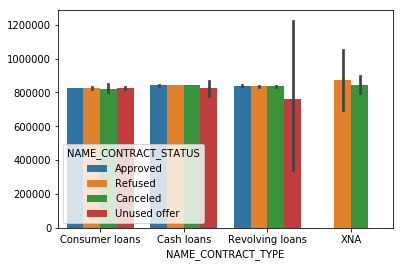

In [9]:
# looking at the number of requests recived for each Contract type and how much of them have been passed/rejected/unused or cancelled.
g = sns.barplot(x = 'NAME_CONTRACT_TYPE' , y=new_dropped_prev_data.index,hue = 'NAME_CONTRACT_STATUS',data = new_dropped_prev_data)
#g.set_yscale('log')

## So we see that for cash Loans, we have a better performance in accepting the loan but on the same time, more number of loans have been cancelled by the user. Whereas if we look at Revolving Loans, we can see that there is a huge variation in the *Unused offer section*.

## Let's try to find the outliers if any in the process.

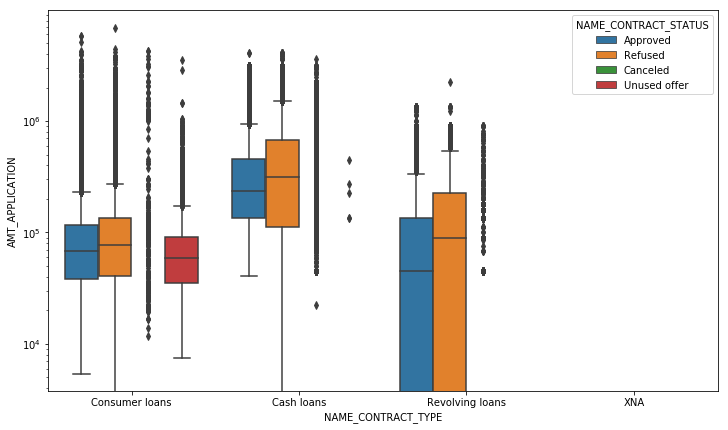

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,7))
ax = sns.boxplot(x = 'NAME_CONTRACT_TYPE' , y = 'AMT_APPLICATION',hue = 'NAME_CONTRACT_STATUS',data = new_dropped_prev_data)
ax.set_yscale('log')

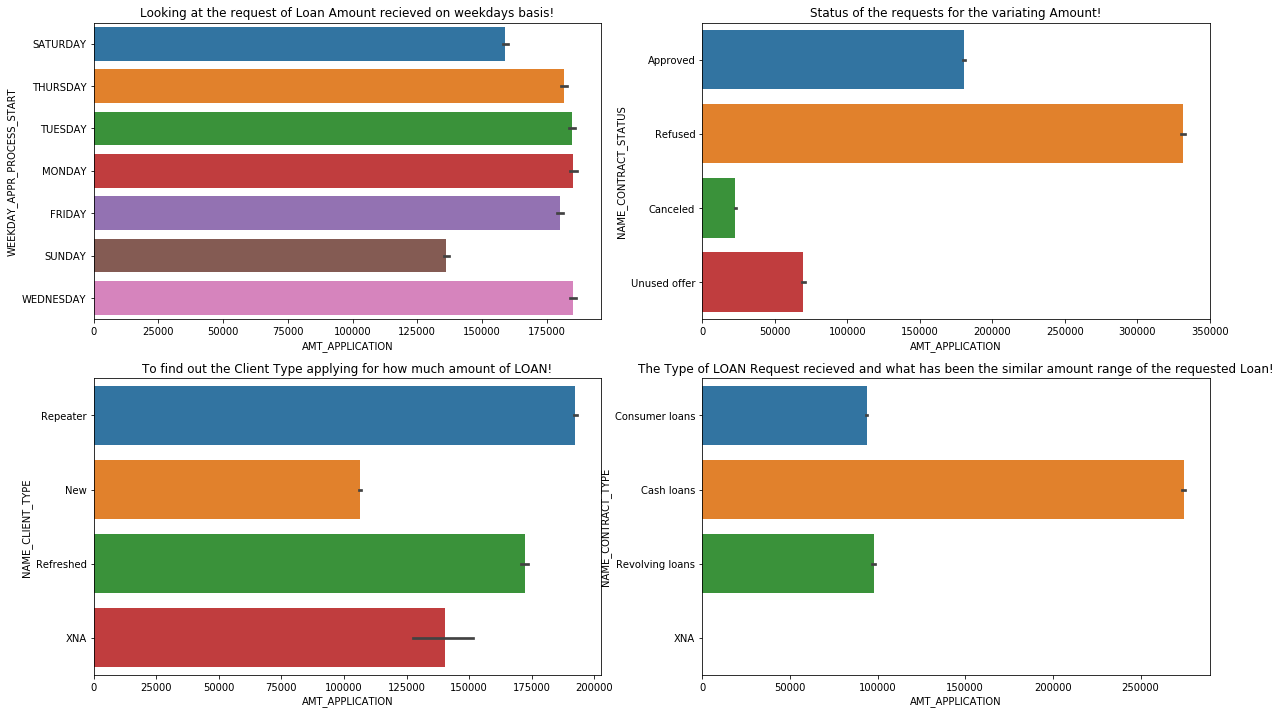

In [11]:
# Next step is to remove the outliers, but before that, let's explore more attributes.
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
plot_amount_weekday = sns.barplot(x = 'AMT_APPLICATION' , y = 'WEEKDAY_APPR_PROCESS_START',data = new_dropped_prev_data)
plt.title('Looking at the request of Loan Amount recieved on weekdays basis!')
plt.subplot(2,2,2)
plot_amount_status = sns.barplot(x = 'AMT_APPLICATION' , y = 'NAME_CONTRACT_STATUS',data = new_dropped_prev_data)
plt.title('Status of the requests for the variating Amount!')
plt.subplot(2,2,3)
plot_amount_client_type = sns.barplot(x = 'AMT_APPLICATION' , y = 'NAME_CLIENT_TYPE',data = new_dropped_prev_data)
plt.title('To find out the Client Type applying for how much amount of LOAN!')
plt.subplot(2,2,4)
plot_amount_contract_type = sns.barplot(x = 'AMT_APPLICATION' , y = 'NAME_CONTRACT_TYPE',data = new_dropped_prev_data)
plt.title('The Type of LOAN Request recieved and what has been the similar amount range of the requested Loan!');

## So we get to see that for Large Amount of money, we are getting requests on the First 3 days of the week!.
## Along with that we can see that the requests between 15 lacs to 25lacs are usually approved whereas requests around 30 lacs are either rejected or cancelled!
## One interesting thing popped is, can we look at the Hour of the Day and find out on which hour, which type of Loan Request has recieved and later on to on which hour what has been status of the requests.
## We can look at different Contract Types/Status of Contracts/Weekdays Performance/Client type by keeping the Numerical Attribute *HOUR_APPR_PROCESS_START* contant, to see the variation for the applying loans!

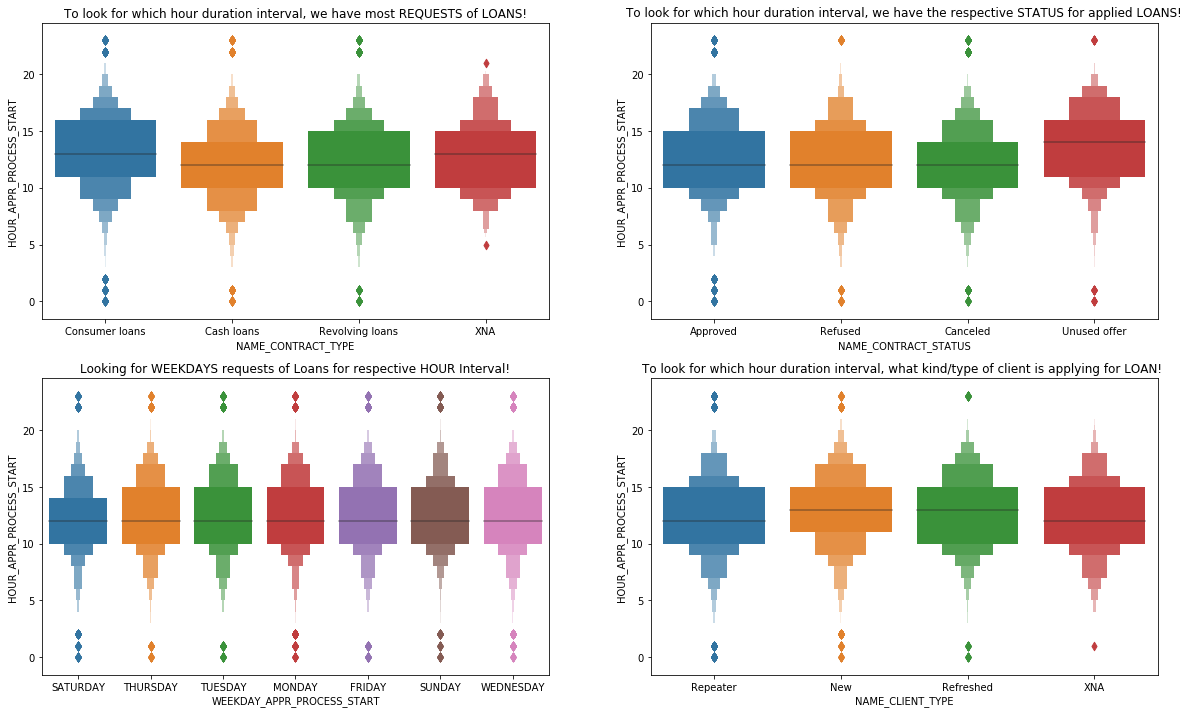

In [12]:
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
plot_client_type_hour_process_contract_type = sns.boxenplot(x = 'NAME_CONTRACT_TYPE' , y = 'HOUR_APPR_PROCESS_START',data = new_dropped_prev_data)
plt.title('To look for which hour duration interval, we have most REQUESTS of LOANS!')
plt.subplot(2,2,2)
plot_client_type_hour_process_contract_status = sns.boxenplot(x = 'NAME_CONTRACT_STATUS' , y = 'HOUR_APPR_PROCESS_START',data = new_dropped_prev_data)
plt.title('To look for which hour duration interval, we have the respective STATUS for applied LOANS!')
plt.subplot(2,2,3)
plot_client_type_hour_process_weekday = sns.boxenplot(x = 'WEEKDAY_APPR_PROCESS_START' , y = 'HOUR_APPR_PROCESS_START',data = new_dropped_prev_data)
plt.title('Looking for WEEKDAYS requests of Loans for respective HOUR Interval!')
plt.subplot(2,2,4)
plot_client_type_hour_process_client_type = sns.boxenplot(x = 'NAME_CLIENT_TYPE' , y = 'HOUR_APPR_PROCESS_START',data = new_dropped_prev_data)
plt.title('To look for which hour duration interval, what kind/type of client is applying for LOAN! ');


## We are trying to find the Amount for which the Status is based on what type of Loan Request has been recieved!

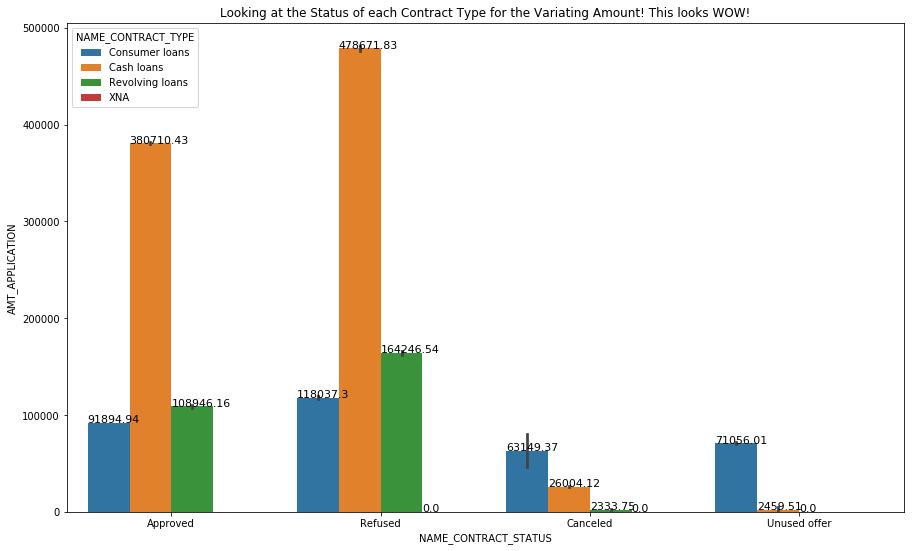

In [13]:
# This BARPLOT in SEABORN is focussed on the MEAN VALUES for the Amount!
plt.figure(figsize=(15,9))
plot_amount_hue_contract_type = sns.barplot(x = 'NAME_CONTRACT_STATUS', y ='AMT_APPLICATION',hue = 'NAME_CONTRACT_TYPE',data = new_dropped_prev_data)
plt.title('Looking at the Status of each Contract Type for the Variating Amount! This looks WOW!');
for i in plot_amount_hue_contract_type.patches:
    plot_amount_hue_contract_type.text(i.get_x(), i.get_height()+.2,str(round(i.get_height(),2)),fontsize = 11)

# Forward going!:
1. We'll try to explore the PORTFOLIO for the Client Type and find out the Amount for the application requested.
2. We'll also look for the Cumulative Status for Portfolios based on the Amount of loan requested.
3. Let's look at the Channel Types from where the client got acquired from the previous application
4. Lastly, we'll try to explore Correlations!

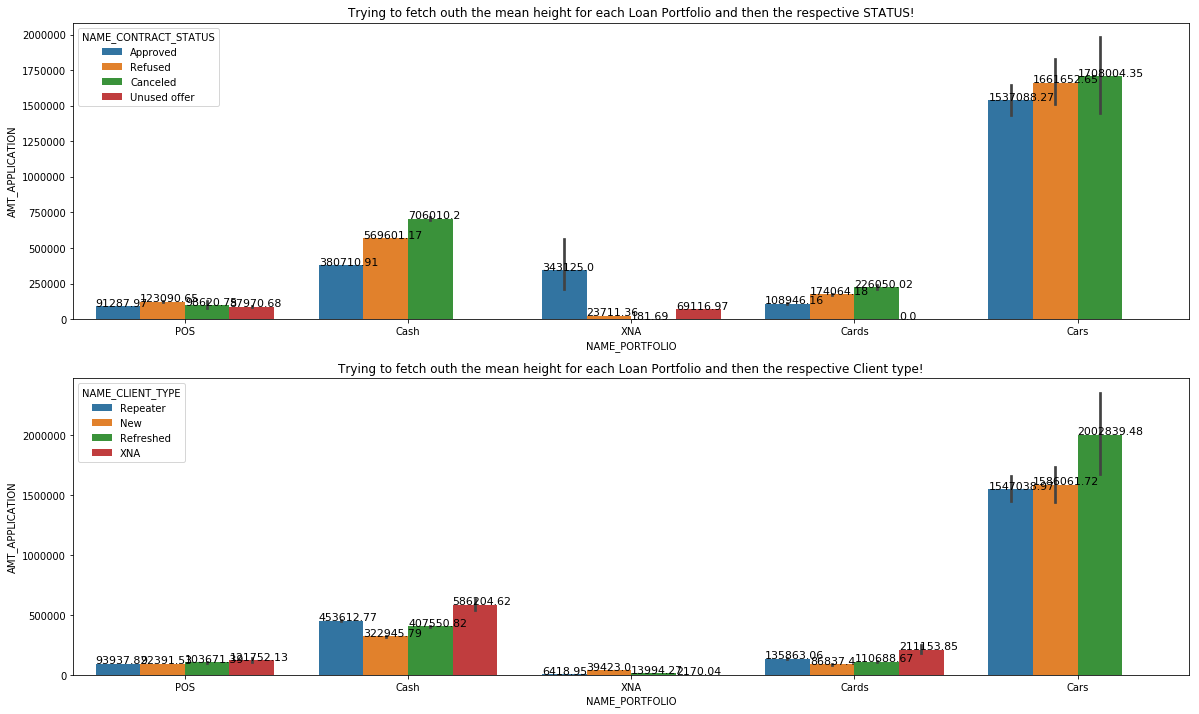

In [14]:
plt.figure(figsize = (20,12))
plt.subplot(2,1,1)
portfolio_status_type_amount = sns.barplot(x = 'NAME_PORTFOLIO', y='AMT_APPLICATION',hue='NAME_CONTRACT_STATUS',data = new_dropped_prev_data,ax=plt.gca())
plt.title('Trying to fetch outh the mean height for each Loan Portfolio and then the respective STATUS!')
for i in portfolio_status_type_amount.patches:
    portfolio_status_type_amount.text(i.get_x(), i.get_height()+.2,str(round(i.get_height(),2)),fontsize = 11)
    
plt.subplot(2,1,2)
portfolio_client_type_amount = sns.barplot(x = 'NAME_PORTFOLIO', y='AMT_APPLICATION',hue='NAME_CLIENT_TYPE',data = new_dropped_prev_data,ax=plt.gca())
plt.title('Trying to fetch outh the mean height for each Loan Portfolio and then the respective Client type!')
for i in portfolio_client_type_amount.patches:
    portfolio_client_type_amount.text(i.get_x(), i.get_height()+.2,str(round(i.get_height(),2)),fontsize = 11)

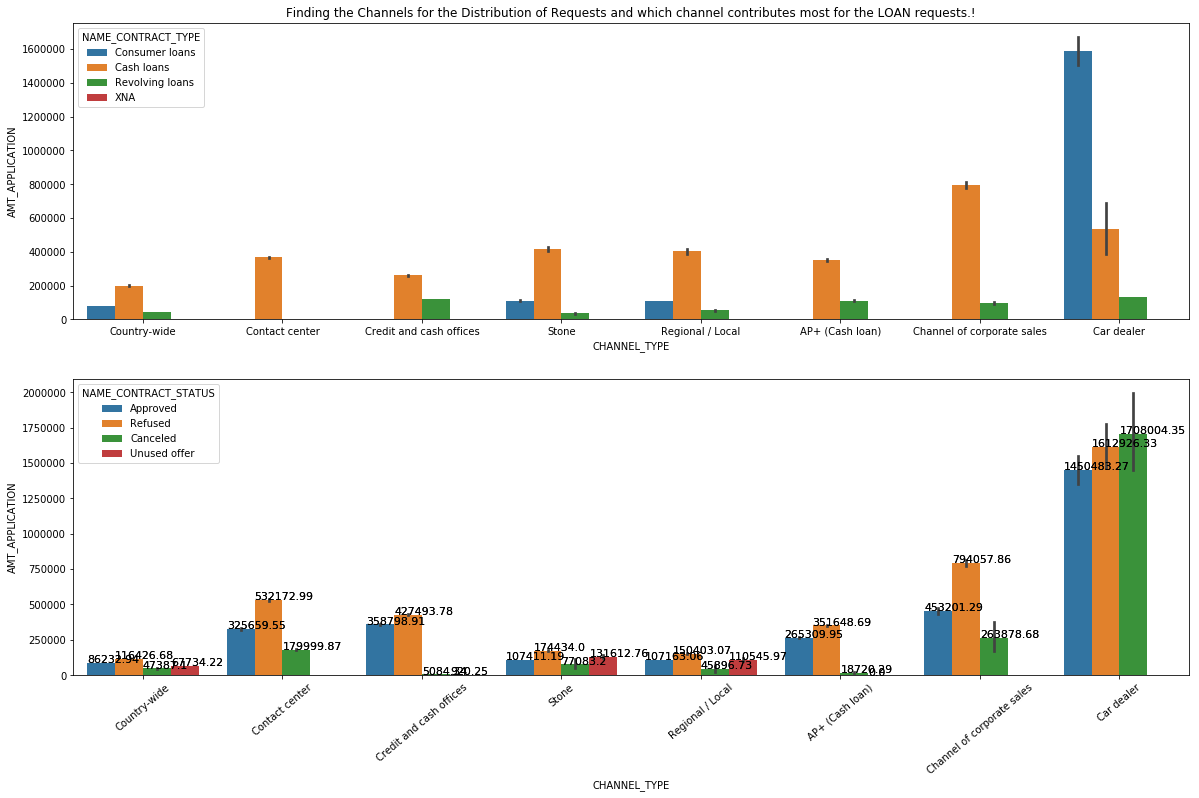

In [15]:
plt.figure(figsize = (20,12))
plt.subplot(2,1,1)
channel_plot = sns.barplot(x = 'CHANNEL_TYPE' , y = 'AMT_APPLICATION' , hue = 'NAME_CONTRACT_TYPE',data = new_dropped_prev_data)
#plt.xticks(rotation=40);
plt.title('Finding the Channels for the Distribution of Requests and which channel contributes most for the LOAN requests.!');
plt.subplot(2,1,2)
channel_plot_status = sns.barplot(x = 'CHANNEL_TYPE' , y = 'AMT_APPLICATION' , hue = 'NAME_CONTRACT_STATUS',data = new_dropped_prev_data)
plt.xticks(rotation=40);
l=[]
for i in channel_plot_status.patches:
    channel_plot_status.text(i.get_x(), i.get_height()+.2,str(round(i.get_height(),2)),fontsize = 11)
    l.append(channel_plot_status.text(i.get_x(), i.get_height()+.2,str(round(i.get_height(),2)),fontsize = 11))

In [16]:
# Let's look at the correlation. But first we need to fetch the important attributes and slice the data frame as per the need!
we_need = ['HOUR_APPR_PROCESS_START','AMT_APPLICATION','FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY']
df_we_need = new_dropped_prev_data.loc[:,we_need]
df_we_need.head(10)

,HOUR_APPR_PROCESS_START,AMT_APPLICATION,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY
0,15,17145.0,Y,1
1,11,607500.0,Y,1
2,11,112500.0,Y,1
3,7,450000.0,Y,1
4,9,337500.0,Y,1
5,8,315000.0,Y,1
6,11,0.0,Y,1
7,7,0.0,Y,1
8,15,0.0,Y,1
9,15,0.0,Y,1


# Looking at the Correlation!

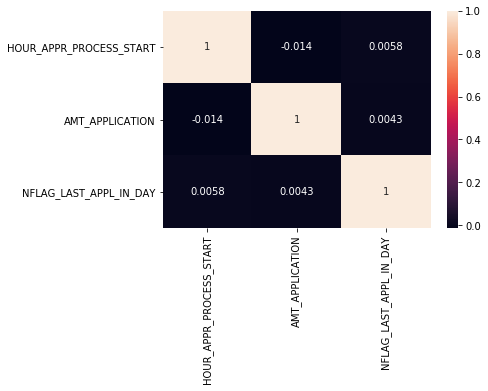

In [17]:
cor = df_we_need.corr()
sns.heatmap(cor,annot=True);

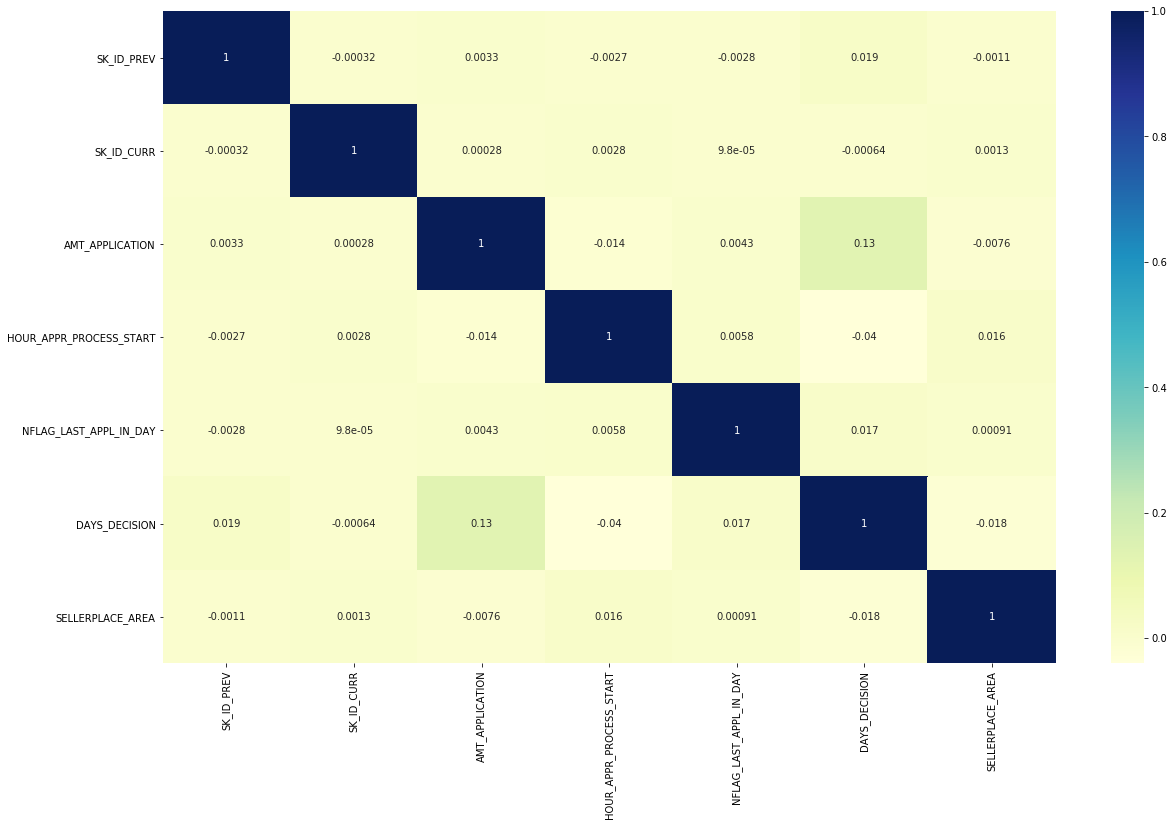

In [18]:
plt.figure(figsize=(20,12))
sns.heatmap(new_dropped_prev_data.corr(),cmap='YlGnBu',annot=True);

# Inferences from the above EDA has been noted down! and then we will check how much it influences the Application Data frame!

## Here we finish the EDA towards the Previous Application Data Set!!

## Now my friend, let's move onto the Application Data Set!

In [19]:
app_data.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,...,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,...,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,-16941,-1588,-4970.0,-477,NaN,1,1,1,1,1,0,Laborers,2.0,2,2,WEDNESDAY,16,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-2536.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,1395000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.035792,-13778,-3130,-1213.0,-619,17.0,1,1,0,1,1,0,Acco

In [20]:
# lets check the missing values by percentage as usual
print(round(100*(app_data.isnull().sum()/len(app_data)),2))

SK_ID_CURR                     0.00
TARGET                         0.00
NAME_CONTRACT_TYPE             0.00
CODE_GENDER                    0.00
FLAG_OWN_CAR                   0.00
FLAG_OWN_REALTY                0.00
CNT_CHILDREN                   0.00
AMT_INCOME_TOTAL               0.00
AMT_CREDIT                     0.00
AMT_ANNUITY                    0.00
AMT_GOODS_PRICE                0.09
NAME_TYPE_SUITE                0.42
NAME_INCOME_TYPE               0.00
NAME_EDUCATION_TYPE            0.00
NAME_FAMILY_STATUS             0.00
NAME_HOUSING_TYPE              0.00
REGION_POPULATION_RELATIVE     0.00
DAYS_BIRTH                     0.00
DAYS_EMPLOYED                  0.00
DAYS_REGISTRATION              0.00
DAYS_ID_PUBLISH                0.00
OWN_CAR_AGE                   65.99
FLAG_MOBIL                     0.00
FLAG_EMP_PHONE                 0.00
FLAG_WORK_PHONE                0.00
FLAG_CONT_MOBILE               0.00
FLAG_PHONE                     0.00
FLAG_EMAIL                  

In [21]:
#so let's drop the missing data as we can see that what we have to analyse
clean_app_data = app_data.dropna(axis=0)
clean_app_data.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
71,100083,0,Cash loans,M,Y,Y,0,103500.0,573628.5,24435.0,463500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.009657,-15406,-892,-341.0,-4176,22.0,1,1,0,1,0,0,Laborers,2.0,2,2,MONDAY,18,0,0,0,0,0,0,...,0.1214,0.0949,0.0000,0.0000,reg oper account,block of flats,0.1324,"Stone, brick",No,2.0,1.0,2.0,1.0,-2053.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
124,100145,0,Cash loans,F,Y,Y,1,202500.0,260725.5,16789.5,198000.0,Family,Working,Secondary / secondary special,Separated,House / apartment,0.018850,-16282,-4375,-762.0,-1494,8.0,1,1,0,1,0,0,Laborers,2.0,2,2,TUESDAY,11,0,0,0,0,0,0,...,0.0770,0.0919,0.0000,0.0000,reg oper spec account,block of flats,0.0710,Panel,No,6.0,0.0,6.0,0.0,-1782.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
152,100179,0,Cash loans,F,Y,N,0,202500.0,675000.0,53329.5,675000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.031329,-11375,-2311,-180.0,-2009,4.0,1,1,0,1,0,0,Managers,2.0,2,2,MONDAY,13,0,0,0,0,0,0,...,0.4361,0.7317,0.2213,0.7892,reg oper account,block of flats,0.7334,Monolithic,No,0.0,0.0,0.0,0.0,-1792.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,4.0
161,100190,0,Cash loans,M,Y,N,0,162000.0,263686.5,24781.5,238500.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.022625,-13972,-4472,-464.0,-4529,3.0,1,1,0,1,1,0,Laborers,2.0,2,2,THURSDAY,16,0,0,0,0,0,0,...,0.2565,0.3628,0.0000,0.0172,reg oper account,block of flats,0.4064,Panel,No,5.0,0.0,5.0,0.0,-1161.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
255,100295,1,Cash loans,M,Y,N,1,225000.0,1019205.0,31032.0,774000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0.072508,-11356,-602,-335.0,-3224,9.0,1,1,0,1,0,0,Laborers,2.0,1,1,MONDAY,14,1,0,1,0,0,0,...,0.1975,0.2310,0.0078,0.0077,reg oper account,block of flats,0.1874,Panel,No,3.0,0.0,3.0,0.0,-14.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.0,0.0,0.0,6.0,0.0,1.0
296,100341,0,Cash loans,M,Y,Y,0,76500.0,545040.0,20677.5,450000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.031329,-20348,-7115,-1799.0,-2780,28.0,1,1,0,1,0,0,Laborers,1.0,2,2,TUESDAY,10,0,0,0,0,0,0,...,0.0402,0.0222,0.0000,0.0000,reg oper account,block of flats,0.0410,"Stone, brick",No,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
298,100343,0,Cash loans,M,Y,Y,0,315000.0,90000.0

In [22]:
clean_app_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8602 entries, 71 to 307482
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 8.1+ MB


In [23]:
clean_app_data.nunique()

SK_ID_CURR                    8602
TARGET                           2
NAME_CONTRACT_TYPE               2
CODE_GENDER                      2
FLAG_OWN_CAR                     1
FLAG_OWN_REALTY                  2
CNT_CHILDREN                     6
AMT_INCOME_TOTAL               266
AMT_CREDIT                    1806
AMT_ANNUITY                   3862
AMT_GOODS_PRICE                389
NAME_TYPE_SUITE                  7
NAME_INCOME_TYPE                 3
NAME_EDUCATION_TYPE              5
NAME_FAMILY_STATUS               5
NAME_HOUSING_TYPE                6
REGION_POPULATION_RELATIVE      78
DAYS_BIRTH                    6103
DAYS_EMPLOYED                 4288
DAYS_REGISTRATION             5715
DAYS_ID_PUBLISH               4190
OWN_CAR_AGE                     47
FLAG_MOBIL                       1
FLAG_EMP_PHONE                   2
FLAG_WORK_PHONE                  2
FLAG_CONT_MOBILE                 2
FLAG_PHONE                       2
FLAG_EMAIL                       2
OCCUPATION_TYPE     

# we see that none of the applicants have provided all documents


In [24]:
docs_df = clean_app_data.iloc[:,-20:]
docs_df.head(10)
clean_app_data['All Docs'] = docs_df.sum(axis=1)
clean_app_data.head(10)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,All Docs
71,100083,0,Cash loans,M,Y,Y,0,103500.0,573628.5,24435.0,463500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.009657,-15406,-892,-341.0,-4176,22.0,1,1,0,1,0,0,Laborers,2.0,2,2,MONDAY,18,0,0,0,0,0,0,...,0.0949,0.0000,0.0000,reg oper account,block of flats,0.1324,"Stone, brick",No,2.0,1.0,2.0,1.0,-2053.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0,3.0
124,100145,0,Cash loans,F,Y,Y,1,202500.0,260725.5,16789.5,198000.0,Family,Working,Secondary / secondary special,Separated,House / apartment,0.018850,-16282,-4375,-762.0,-1494,8.0,1,1,0,1,0,0,Laborers,2.0,2,2,TUESDAY,11,0,0,0,0,0,0,...,0.0919,0.0000,0.0000,reg oper spec account,block of flats,0.0710,Panel,No,6.0,0.0,6.0,0.0,-1782.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0,3.0
152,100179,0,Cash loans,F,Y,N,0,202500.0,675000.0,53329.5,675000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.031329,-11375,-2311,-180.0,-2009,4.0,1,1,0,1,0,0,Managers,2.0,2,2,MONDAY,13,0,0,0,0,0,0,...,0.7317,0.2213,0.7892,reg oper account,block of flats,0.7334,Monolithic,No,0.0,0.0,0.0,0.0,-1792.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,4.0,6.0
161,100190,0,Cash loans,M,Y,N,0,162000.0,263686.5,24781.5,238500.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.022625,-13972,-4472,-464.0,-4529,3.0,1,1,0,1,1,0,Laborers,2.0,2,2,THURSDAY,16,0,0,0,0,0,0,...,0.3628,0.0000,0.0172,reg oper account,block of flats,0.4064,Panel,No,5.0,0.0,5.0,0.0,-1161.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0,3.0
255,100295,1,Cash loans,M,Y,N,1,225000.0,1019205.0,31032.0,774000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0.072508,-11356,-602,-335.0,-3224,9.0,1,1,0,1,0,0,Laborers,2.0,1,1,MONDAY,14,1,0,1,0,0,0,...,0.2310,0.0078,0.0077,reg oper account,block of flats,0.1874,Panel,No,3.0,0.0,3.0,0.0,-14.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.0,0.0,0.0,6.0,0.0,1.0,8.0
296,100341,0,Cash loans,M,Y,Y,0,76500.0,545040.0,20677.5,450000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.031329,-20348,-7115,-1799.0,-2780,28.0,1,1,0,1,0,0,Laborers,1.0,2,2,TUESDAY,10,0,0,0,0,0,0,...,0.0222,0.0000,0.0000,reg oper account,block of flats,0.0410,"Stone, brick",No,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
298,100343,0,Cash loans,M,Y,Y,0,315000.0,90000.0,4504.5,90000.0,Unaccompanied,W

In [25]:
df_eda = clean_app_data.iloc[:,:20]
df_eda['Docs Submitted'] = clean_app_data['All Docs']
df_eda['Occupation type'] = clean_app_data['OCCUPATION_TYPE']
df_eda['Organization Type'] = clean_app_data['ORGANIZATION_TYPE']
df_eda.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,Docs Submitted,Occupation type,Organization Type
71,100083,0,Cash loans,M,Y,Y,0,103500.0,573628.5,24435.0,463500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.009657,-15406,-892,-341.0,3.0,Laborers,Business Entity Type 3
124,100145,0,Cash loans,F,Y,Y,1,202500.0,260725.5,16789.5,198000.0,Family,Working,Secondary / secondary special,Separated,House / apartment,0.018850,-16282,-4375,-762.0,3.0,Laborers,Self-employed
152,100179,0,Cash loans,F,Y,N,0,202500.0,675000.0,53329.5,675000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.031329,-11375,-2311,-180.0,6.0,Managers,Trade: type 7
161,100190,0,Cash loans,M,Y,N,0,162000.0,263686.5,24781.5,238500.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.022625,-13972,-4472,-464.0,3.0,Laborers,Government
255,100295,1,Cash loans,M,Y,N,1,225000.0,1019205.0,31032.0,774000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0.072508,-11356,-602,-335.0,8.0,Laborers,Business Entity Type 3
296,100341,0,Cash loans,M,Y,Y,0,76500.0,545040.0,20677.5,450000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.031329,-20348,-7115,-1799.0,1.0,Laborers,Industry: type 2
298,100343,0,Cash loans,M,Y,Y,0,315000.0,90000.0,4504.5,90000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,With parents,0.022800,-10935,-422,-5251.0,2.0,Drivers,Business Entity Type 3
316,100363,0,Cash loans,F,Y,Y,1,360000.0,493497.0,48942.0,454500.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.006629,-14882,-436,-1140.0,2.0,Core staff,Bank
323,100371,0,Cash loans,F,Y,Y,1,450000.0,808650.0,31464.0,675000.0,Unaccompanied,Commercial associate,Higher education,Civil marriage,House / apartment,0.072508,-14768,-426,-3241.0,1.0,Core staff,Kindergarten
328,100376,0,Cash loans,M,Y,Y,0,360000.0,254700.0,20250.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.018801,-18831,-1342,-8691.0,1.0,Drivers,Transport: type 3


In [26]:
print(df_eda.info())
print(df_eda.shape)
print(df_eda.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8602 entries, 71 to 307482
Data columns (total 23 columns):
SK_ID_CURR                    8602 non-null int64
TARGET                        8602 non-null int64
NAME_CONTRACT_TYPE            8602 non-null object
CODE_GENDER                   8602 non-null object
FLAG_OWN_CAR                  8602 non-null object
FLAG_OWN_REALTY               8602 non-null object
CNT_CHILDREN                  8602 non-null int64
AMT_INCOME_TOTAL              8602 non-null float64
AMT_CREDIT                    8602 non-null float64
AMT_ANNUITY                   8602 non-null float64
AMT_GOODS_PRICE               8602 non-null float64
NAME_TYPE_SUITE               8602 non-null object
NAME_INCOME_TYPE              8602 non-null object
NAME_EDUCATION_TYPE           8602 non-null object
NAME_FAMILY_STATUS            8602 non-null object
NAME_HOUSING_TYPE             8602 non-null object
REGION_POPULATION_RELATIVE    8602 non-null float64
DAYS_BIRTH           

In [27]:
# Now we will try to fetch the AMT _APPLICATION from the previous application data set
data_from_prev = new_dropped_prev_data.loc[:,['SK_ID_CURR','AMT_APPLICATION']]
merge_app_prev_df = df_eda.merge(data_from_prev,on = 'SK_ID_CURR')
merge_app_prev_df.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,Docs Submitted,Occupation type,Organization Type,AMT_APPLICATION
0,100083,0,Cash loans,M,Y,Y,0,103500.0,573628.5,24435.0,463500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.009657,-15406,-892,-341.0,3.0,Laborers,Business Entity Type 3,157500.0
1,100083,0,Cash loans,M,Y,Y,0,103500.0,573628.5,24435.0,463500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.009657,-15406,-892,-341.0,3.0,Laborers,Business Entity Type 3,48181.5
2,100083,0,Cash loans,M,Y,Y,0,103500.0,573628.5,24435.0,463500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.009657,-15406,-892,-341.0,3.0,Laborers,Business Entity Type 3,0.0
3,100145,0,Cash loans,F,Y,Y,1,202500.0,260725.5,16789.5,198000.0,Family,Working,Secondary / secondary special,Separated,House / apartment,0.018850,-16282,-4375,-762.0,3.0,Laborers,Self-employed,427500.0
4,100145,0,Cash loans,F,Y,Y,1,202500.0,260725.5,16789.5,198000.0,Family,Working,Secondary / secondary special,Separated,House / apartment,0.018850,-16282,-4375,-762.0,3.0,Laborers,Self-employed,66555.0
5,100145,0,Cash loans,F,Y,Y,1,202500.0,260725.5,16789.5,198000.0,Family,Working,Secondary / secondary special,Separated,House / apartment,0.018850,-16282,-4375,-762.0,3.0,Laborers,Self-employed,92695.5
6,100145,0,Cash loans,F,Y,Y,1,202500.0,260725.5,16789.5,198000.0,Family,Working,Secondary / secondary special,Separated,House / apartment,0.018850,-16282,-4375,-762.0,3.0,Laborers,Self-employed,60741.9
7,100145,0,Cash loans,F,Y,Y,1,202500.0,260725.5,16789.5,198000.0,Family,Working,Secondary / secondary special,Separated,House / apartment,0.018850,-16282,-4375,-762.0,3.0,Laborers,Self-employed,28935.0
8,100145,0,Cash loans,F,Y,Y,1,202500.0,260725.5,16789.5,198000.0,Family,Working,Secondary / secondary special,Separated,House / apartment,0.018850,-16282,-4375,-762.0,3.0,Laborers,Self-employed,720000.0
9,100179,0,Cash loans,F,Y,N,0,202500.0,675000.0,53329.5,675000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.031329,-11375,-2311,-180.0,6.0,Managers,Trade: type 7,675000.0


In [28]:
#Let's check the shape
print(merge_app_prev_df.shape)
print(merge_app_prev_df.isnull().sum())

(40416, 24)
SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
CNT_CHILDREN                  0
AMT_INCOME_TOTAL              0
AMT_CREDIT                    0
AMT_ANNUITY                   0
AMT_GOODS_PRICE               0
NAME_TYPE_SUITE               0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
NAME_HOUSING_TYPE             0
REGION_POPULATION_RELATIVE    0
DAYS_BIRTH                    0
DAYS_EMPLOYED                 0
DAYS_REGISTRATION             0
Docs Submitted                0
Occupation type               0
Organization Type             0
AMT_APPLICATION               0
dtype: int64


## Now, let's see that created Data frame and explore some inference!

In [29]:
merge_app_prev_df.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,Docs Submitted,Occupation type,Organization Type,AMT_APPLICATION
0,100083,0,Cash loans,M,Y,Y,0,103500.0,573628.5,24435.0,463500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.009657,-15406,-892,-341.0,3.0,Laborers,Business Entity Type 3,157500.0
1,100083,0,Cash loans,M,Y,Y,0,103500.0,573628.5,24435.0,463500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.009657,-15406,-892,-341.0,3.0,Laborers,Business Entity Type 3,48181.5
2,100083,0,Cash loans,M,Y,Y,0,103500.0,573628.5,24435.0,463500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.009657,-15406,-892,-341.0,3.0,Laborers,Business Entity Type 3,0.0
3,100145,0,Cash loans,F,Y,Y,1,202500.0,260725.5,16789.5,198000.0,Family,Working,Secondary / secondary special,Separated,House / apartment,0.018850,-16282,-4375,-762.0,3.0,Laborers,Self-employed,427500.0
4,100145,0,Cash loans,F,Y,Y,1,202500.0,260725.5,16789.5,198000.0,Family,Working,Secondary / secondary special,Separated,House / apartment,0.018850,-16282,-4375,-762.0,3.0,Laborers,Self-employed,66555.0


In [30]:
merge_app_prev_df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,Docs Submitted,AMT_APPLICATION
count,40416.000000,40416.000000,40416.000000,4.041600e+04,4.041600e+04,40416.000000,4.041600e+04,40416.000000,40416.000000,40416.000000,40416.000000,40416.000000,4.041600e+04
mean,279587.703731,0.067548,0.594839,2.194598e+05,6.714280e+05,31092.567065,6.074591e+05,0.022863,-14247.624010,-2350.246115,-4266.398877,3.619532,1.980073e+05
std,102755.140138,0.250971,0.781078,1.220990e+05,4.358626e+05,15609.035082,4.023797e+05,0.015300,3243.410267,2017.579401,3069.700974,2.495566,3.474438e+05
min,100083.000000,0.000000,0.000000,3.375000e+04,4.500000e+04,2317.500000,4.500000e+04,0.000290,-24835.000000,-14375.000000,-17176.000000,0.000000,0.000000e+00
25%,190627.000000,0.000000,0.000000,1.350000e+05,3.127680e+05,19827.000000,2.700000e+05,0.010643,-16330.000000,-3234.000000,-6525.000000,2.000000,2.524117e+04
50%,279619.000000,0.000000,0.000000,2.025000e+05,5.538060e+05,28984.500000,4.725000e+05,0.020246,-13940.000000,-1794.000000,-3920.000000,3.000000,7.460550e+04
75%,371761.000000,0.000000,1.000000,2.700000e+05,9.000000e+05,39811.500000,8.775000e+05,0.028663,-11706.000000,-879.750000,-1503.000000,5.000000,1.800000e+05
max,456226.000000,1.000000,5.000000,4.500000e+06,4.050000e+06,180576.000000,4.050000e+06,0.072508,-7715.000000,-4.000000,0.000000,19.000000,3.982500e+06


In [31]:
# Let's look at the Unique values
merge_app_prev_df.nunique()

SK_ID_CURR                     8089
TARGET                            2
NAME_CONTRACT_TYPE                2
CODE_GENDER                       2
FLAG_OWN_CAR                      1
FLAG_OWN_REALTY                   2
CNT_CHILDREN                      6
AMT_INCOME_TOTAL                217
AMT_CREDIT                     1739
AMT_ANNUITY                    3647
AMT_GOODS_PRICE                 376
NAME_TYPE_SUITE                   7
NAME_INCOME_TYPE                  3
NAME_EDUCATION_TYPE               5
NAME_FAMILY_STATUS                5
NAME_HOUSING_TYPE                 6
REGION_POPULATION_RELATIVE       78
DAYS_BIRTH                     5841
DAYS_EMPLOYED                  4174
DAYS_REGISTRATION              5469
Docs Submitted                   20
Occupation type                  18
Organization Type                55
AMT_APPLICATION               11746
dtype: int64

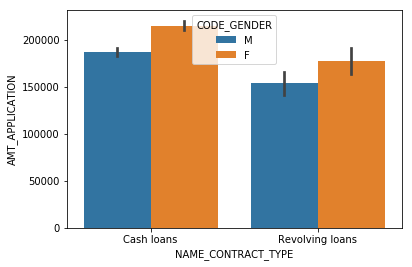

In [32]:
# Let's look for gender wise data
sns.barplot(x = 'NAME_CONTRACT_TYPE' , y='AMT_APPLICATION',hue = 'CODE_GENDER',data = merge_app_prev_df);

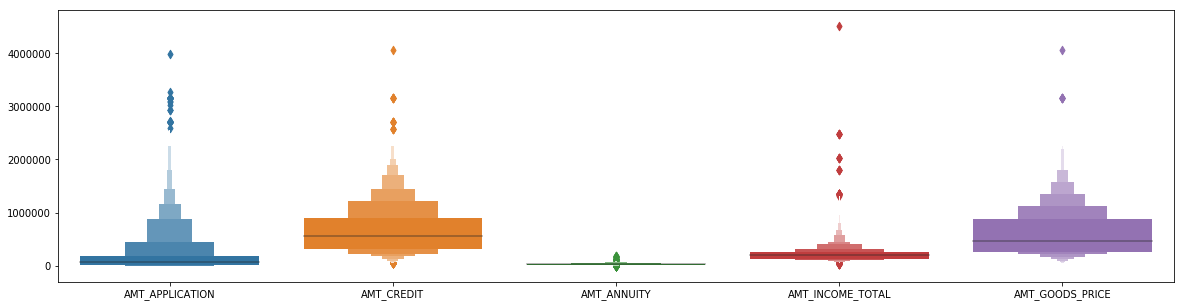

In [33]:
# let's check for outliers in our Numerical values
df_outlier = merge_app_prev_df.loc[:,['AMT_APPLICATION','AMT_CREDIT','AMT_ANNUITY','AMT_INCOME_TOTAL','AMT_GOODS_PRICE']]
df_outlier.head(10)
#Let's plot
plt.figure(figsize=(20,5))
sns.boxenplot(data = df_outlier);
# we have outliers in AMT_INCOME_TOTAL and AMT_CREDIT

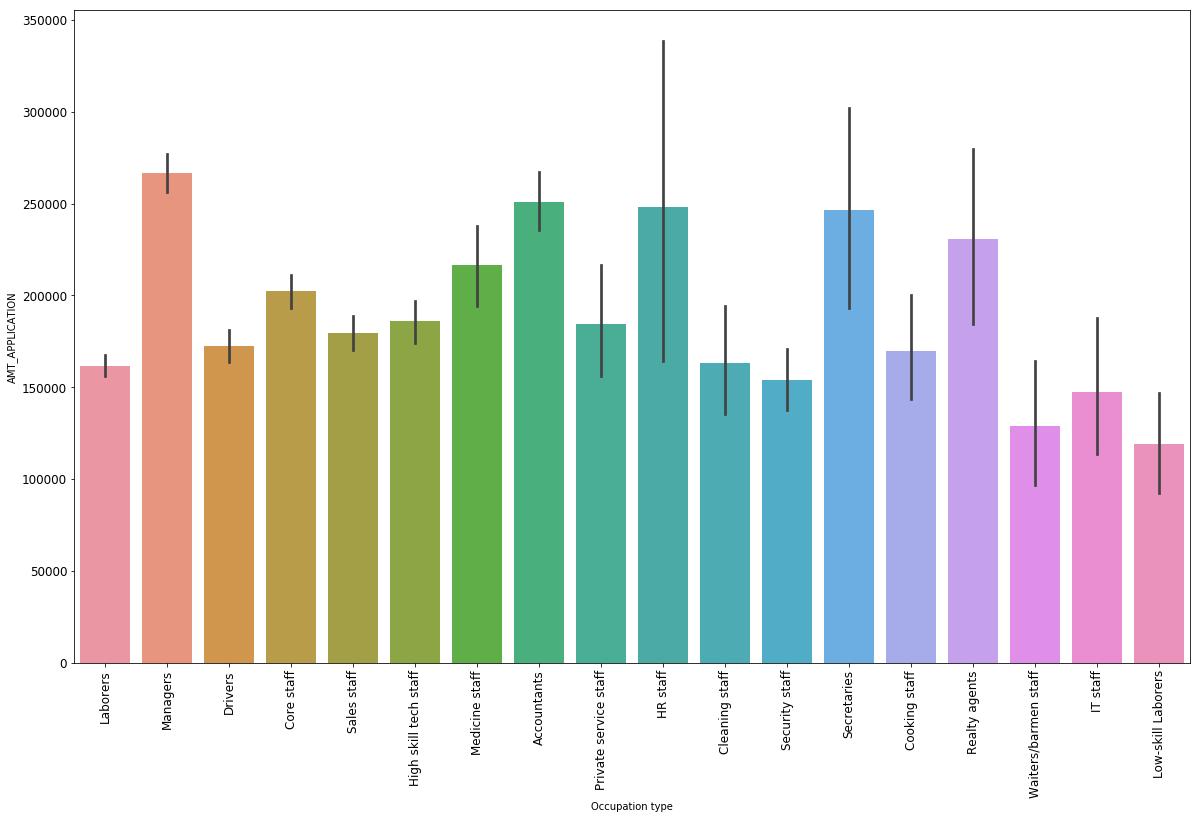

In [34]:
# Let's see what Occupation and Organization type from we recieve requests from of how much amount
plt.figure(figsize=(20,12))
sns.barplot(x = 'Occupation type' , y='AMT_APPLICATION',data = merge_app_prev_df);
plt.xticks(rotation=90,fontsize = 12);
plt.yticks(fontsize = 12);

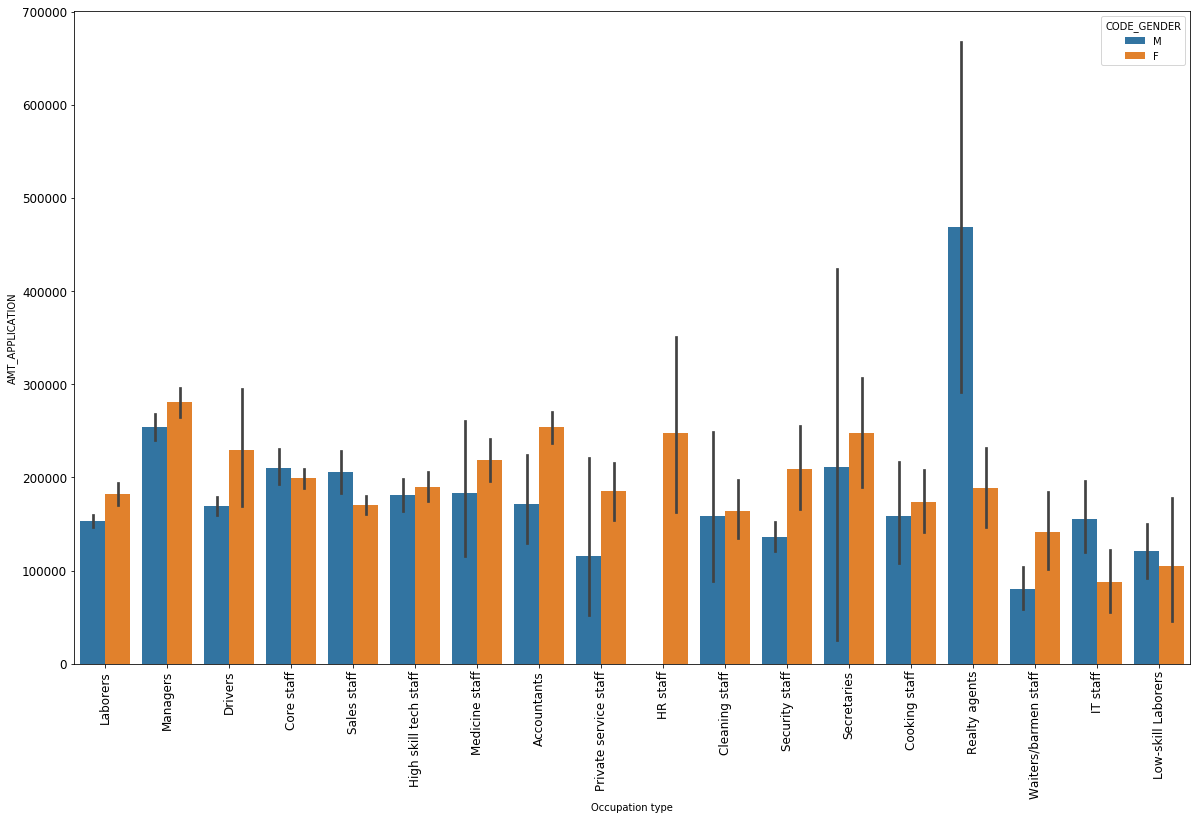

In [35]:
# Let's see the Affect of Gender type for the Occupations
plt.figure(figsize=(20,12))
sns.barplot(x = 'Occupation type' , y='AMT_APPLICATION',hue = 'CODE_GENDER',data = merge_app_prev_df);
plt.xticks(rotation=90,fontsize = 12);
plt.yticks(fontsize = 12);

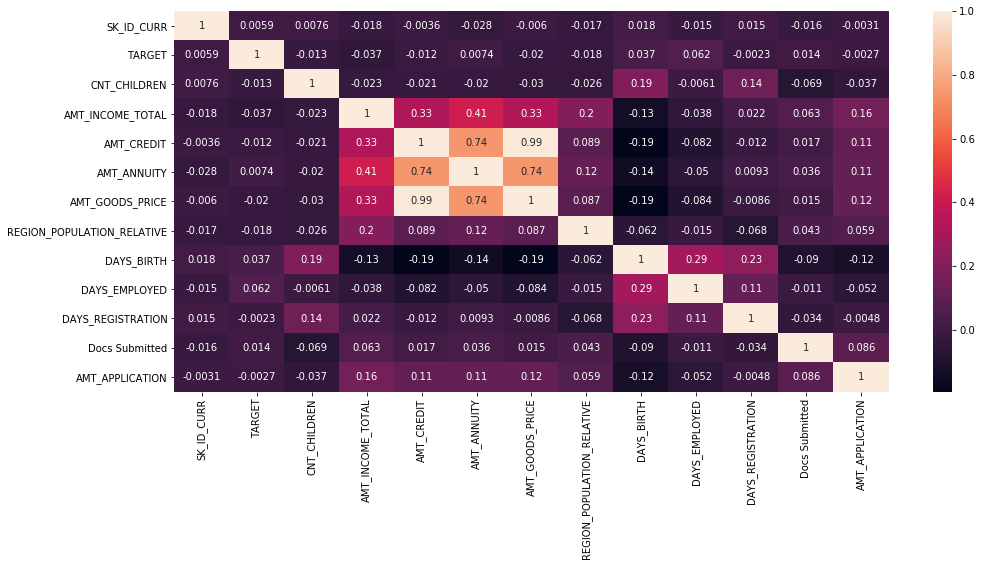

In [36]:
plt.figure(figsize=(16,7))
corr_merge = merge_app_prev_df.corr()
sns.heatmap(corr_merge,annot=True);

# Thank You for Reading. Until next time,think what you can contribute and Upvote if you like it!